In [2]:
import pyvo as vo
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.utils.data import download_file
from astropy.io import fits
from photutils.aperture import CircularAperture, CircularAnnulus, aperture_photometry
import pandas as pd


In [3]:
%matplotlib inline


# Extracting a galaxy through the WISE image service

##  For NGC 7793 

In [ ]:
# using the website that Irsa.ipac relocates you that has a full explanationm of all the code you need
#using NGC 5128: ra= 201.365	dec= -43.019
#SWITCHED it to NGC 7793 ra= 359.45700000000016 dec= -32.592000000000013

#define coordinates	
ra= 359.45700000000016
dec= -32.592000000000013
pos = SkyCoord(ra=ra, dec=dec, unit= 'deg')
print(pos)

In [ ]:
# Lookup and define a service for ALLWISE Atlas images
# the website gave me the URL
allwise_service = vo.dal.SIAService("https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?")


In [ ]:
#search the service for images covering within 1 arcsecond of the star. make this bigger if needed
im_table = allwise_service.search(pos=pos, size= 1*u.arcsec)
#im_table

In [ ]:
im_table.to_table().colnames

In [ ]:
im_table.to_table()['sia_url']

In [ ]:
im_table.to_table()['sia_bp_id']
# i believe this gives us the different bandpasses that you can view the image in. 

In [ ]:
for i in range(len(im_table)):
    print(im_table[i])

In [ ]:
#search for the image in the W3 band image
# using a for loop i assume because it may be printed multiple times maybe?
# i printed it above, it could just be because the ID of the one object is printed 4 times due to there being 4 bandpasses but if you define it at W3 not sure why this is all necessary

for i in range(len(im_table)):
    if im_table[i]['sia_bp_id'] == 'W1':
        break
print(im_table[i].getdataurl())
# ahh yes, so the it runs over the "i" in the dataset until it finds W3 and then stops 
# so using "break" makes the for loop stop after it finds the ID of the object inside of W3
# this is prolly very useful if i am looking for multiple objects.

In [ ]:
#Download the image and open it in Astropy
fname = download_file(im_table[i].getdataurl(), cache=True)
image1= fits.open(fname)
image= image1[0].data
plt.imshow(image, origin = 'lower', vmax = 50)
#plt.xlim(3000,4000)
#plt.ylim(3700,4100)

In [ ]:
#extract a cutout and plot it
wcs = WCS(image1[0].header)
print(image1[0].header)
wcs


In [ ]:
#cuting out the image of the galaxy apart from the rest of the background.
cutout = Cutout2D(image, pos, (400,400), wcs=wcs)
wcs = cutout.wcs

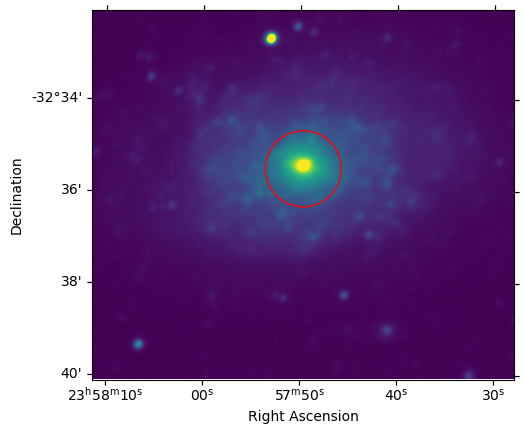

In [337]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection = wcs)

#vmax at 4000 gives you the (bulge maybe?) right in the center of it
ax.imshow(cutout.data, origin='lower', vmax = 50)

ax.scatter(ra, dec, transform= ax.get_transform('fk5'), facecolor= 'None', s=3000, edgecolor = 'red', alpha = 1)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
#Axis. get_transform() function in axis module of matplotlib library is used to get the "Transform instance used by this artist"

## For NGC 5128


('W4 Coadd 2022m425_ac51', 'https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/20/2022/2022m425_ac51/2022m425_ac51-w4-int-3.fits', '{"aws": {"bucket_name": "nasa-irsa-wise", "key":"wise/allwise/images/p3am_cdd/20/2022/2022m425_ac51/2022m425_ac51-w4-int-3.fits", "region": "us-west-2"}}', 2, 'image/fits', 202.248532, -42.404444, array([4095, 4095], dtype=int32), array([2048., 2048.]), array([202.248532, -42.404444]), 'SIN', array([-0.00038194,  0.00038194]), array([-0.00038194, -0.        , -0.        ,  0.00038194]), 'W4', 2.209e-05, 2.336e-05, 1.984e-05, 'm', 13.0, 0.012, 'https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/20/2022/2022m425_ac51/2022m425_ac51-w4-unc-3.fits.gz', 'https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/20/2022/2022m425_ac51/2022m425_ac51-w4-cov-3.fits.gz', '2022m425_ac51')
('W2 Coadd 2022m425_ac51', 'https://irsa.ipac.caltech.edu/ibe/data/wise/allwise/p3am_cdd/20/2022/2022m425_ac51/2022m425_ac51-w2-int-3.fits', '{"aws": {"bucket_n

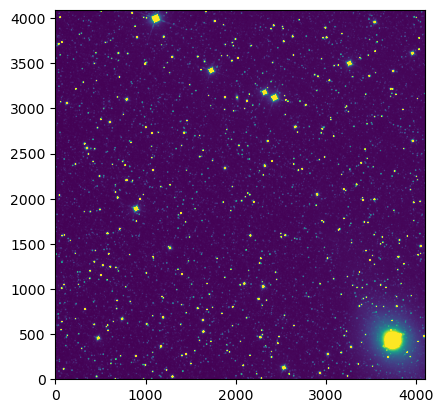

In [338]:
# using the website that Irsa.ipac relocates you that has a full explanationm of all the code you need
#using NGC 5128: ra= 201.365	dec= -43.019
#SWITCHED it to NGC 7793 ra= 359.45700000000016 dec= -32.592000000000013

#define coordinates	
ra= 201.365	
dec= -43.019

pos = SkyCoord(ra=ra, dec=dec, unit= 'deg')
#print(pos)

# Lookup and define a service for ALLWISE Atlas images
# the website gave me the URL
allwise_service = vo.dal.SIAService("https://irsa.ipac.caltech.edu/ibe/sia/wise/allwise/p3am_cdd?")

#search the service for images covering within 1 arcsecond of the star. make this bigger if needed
im_table = allwise_service.search(pos=pos, size= 1*u.arcsec)
#im_table


im_table.to_table().colnames
im_table.to_table()['sia_url']
im_table.to_table()['sia_bp_id'] # i believe this gives us the different bandpasses that you can view the image in. 


for i in range(len(im_table)):
    print(im_table[i])

    #search for the image in the W3 band image

for i in range(len(im_table)):
    if im_table[i]['sia_bp_id'] == 'W1':
        break
print(im_table[i].getdataurl())


#Download the image and open it in Astropy
fname = download_file(im_table[i].getdataurl(), cache=True)
image1= fits.open(fname)
image= image1[0].data
plt.imshow(image, origin = 'lower', vmax = 50)
#plt.xlim(3000,4000)
#plt.ylim(3700,4100)

#extract a cutout and plot it
wcs = WCS(image1[0].header)
print(image1[0].header)
wcs


#cuting out the image of the galaxy apart from the rest of the background.
cutout = Cutout2D(image, pos, (400,400), wcs=wcs)
wcs = cutout.wcs




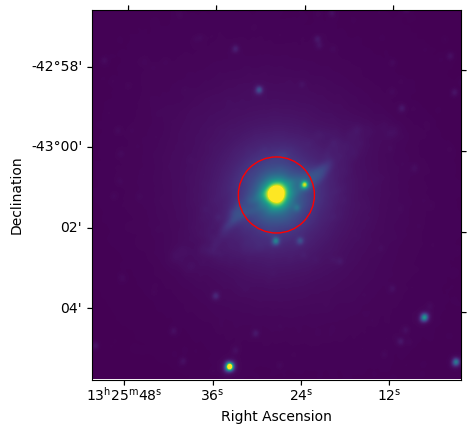

In [348]:
# plotting the image
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection = wcs)

#vmax at 4000 gives you the (bulge maybe?) right in the center of it
ax.imshow(cutout.data, origin='lower', vmax = 1000)

ax.scatter(ra, dec, transform= ax.get_transform('fk5'), facecolor= 'None', s=3000, edgecolor = 'red', alpha = 1)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
#Axis. get_transform() function in axis module of matplotlib library is used to get the "Transform instance used by this artist"

# Exploring the downloadable FITS provided by the website 
to understand the properties of the image

In [535]:
# looking at the WISE specific fits
hdul = fits.open('../Data/image_WISE-Band-1.fits')
hdul.info()

Filename: ../Data/image_WISE-Band-1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      67   (437, 369)   float32   


In [536]:
hdr = fits.getheader('../Data/image_WISE-Band-1.fits')
hdr
#the units are in units of intensity "DN"

SIMPLE  =                    T / Created with PDL (http://pdl.perl.org)         
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  437 / length of data axis 1                          
NAXIS2  =                  369 / length of data axis 2                          
BUNIT   = 'DN      '           / image pixel units                              
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CRVAL1  =             0.000000 / RA at CRPIX1,CRPIX2, J2000.0 (deg)             
CRVAL2  =           -33.317778 / Dec at CRPIX1,CRPIX2, J2000.0 (deg)            
EQUINOX =               2000.0 / Equinox of WCS, (year)                         
CTYPE1  = 'RA---SIN'        

In [ ]:
#opening the image in a way similar to astroimagej
# for single aperture
hdul = fits.open('../Data/image_WISE-Band-1.fits')
phdul = hdul[0].data
plt.imshow(phdul, vmax = 40, origin='lower')

#define the Region(s) Of Interest (center x, center y, radius)
ROI = [(230,230,50)] #and , (180,340,50)

#create aperture objects
aperture = [CircularAperture((x,y),r) for (x,y,r) in ROI]


#perform aperture photometry
photo_table = aperture_photometry(phdul, aperture)
print(photo_table)
#results
for i, aperture in  enumerate(aperture):
    flux = photo_table['aperture_sum_0'][i]
print(flux)
hdul.close()

In [ ]:
# for multiple apertures
hdul = fits.open('../Data/image_WISE-Band-1.fits')
phdul = hdul[0].data
plt.imshow(phdul, vmax = 40, origin='lower')

#define the Region(s) Of Interest (center x, center y, radius)
ROI = [(220,220,100), (186,341,11)] #and , (180,340,50)

#results
for i, (x,y,r) in  enumerate(ROI):
   #create aperture objects 
    aperture = CircularAperture((x,y),r)
   #perform aperture photometry
    photo_table = aperture_photometry(phdul, aperture)
    #print(photo_table)
    flux = photo_table['aperture_sum'][0]
    print(f"Region {i+1}: Center=({x}, {y}), Radius={r}")
    print(f"Flux: {flux}")

#visualizing the apertures
for x,y,r in ROI:
    aperture = CircularAperture((x,y),r)
    aperture.plot(color='red', lw = 1.5)


hdul.close()
    

In [ ]:
#code for creating a background ring. also need to retrieve the source-sky uncertainty? leave that for later for now

In [ ]:
#converting vega magnitudesto source flux density for sources with constant power-law spectra: Fv proportional to V^not
#apparent magnitude of vega is .03  and absolute mag is .6
#mvega = .03
#flx_dens_jy = 309.54*(10**(mvega/2.5)


# Flux conversion

In [ ]:
#Converting counts in DN to flux density units
#Instrumental Zero Point Magnitude for WISE Source Photometry in the W1 Band is 20.73
#print(phdul)

#Confused cuz I am not sure what the variable is to convert all of the counts to flux


#Calibrated Magnitude
M0instr = 20.5 # find the relative instrumental zero point magnitude in this specific band (W1) in this case it is 20.5 but the general one is also 20.73
counts = flux # or phdul['MEDINT']? which is the median intensity
Mcal = M0instr - 2.5*(np.log10(counts))
#print(Mcal)

#convert Magnitude to Flux
flx_conv_fact =  309.54 # the  Zero Magnitude Flux Density conversion factor
flx_jy = flx_conv_fact * 10**(Mcal/-2.5)
print(flx_jy)



#mvega = .03
#flx_dens_jy = 309.54*(10**(mvega/2.5)


# Multi-aperture photometry code
## USING NGC 7793

In [ ]:
# for multiple apertures while putting in the flux conversion
hdul = fits.open('../Data/image_WISE-Band-1.fits')
phdul = hdul[0].data
plt.imshow(phdul, vmax = 40, origin='lower')

#define the Region(s) Of Interest (center x, center y, radius)
ROI = [(220, 220, 100, 135, 200), (186, 341, 10, 17, 25)] # (x, y, radius around target, inner r, outer r)
#empty data frame to append values of flux to
#display_data = pd.DataFrame(columns= ['Region', 'X', 'Y', 'Radius', 'Flux (Jy)'])
rows=[]
M0instr = 20.5 # find the relative instrumental zero point magnitude in this specific band (W1) in this case it is 20.5 but the general one is also 20.73
flx_conv_fact =  309.54 # the  Zero Magnitude Flux Density conversion factor 

#results
for i, (x, y, r, annulus_inner, annulus_outer) in  enumerate(ROI):
# For the Target object in the little circle
   #define the target aperture objects 
    target_aperture = CircularAperture((x,y),r,)
    
    #perform aperture photometry on target
    target_photo_table = aperture_photometry(phdul, target_aperture)
    target_counts = target_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_trgt = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    target_flux = flx_conv_fact * 10**(Mcal_trgt/-2.5)      #convert Magnitude to Flux
    #calculate area of annulus
    target_area = target_aperture.area



# For the Background Annuli of outside of the Target
    #define the background annulus for the taget (i think i need to do CircularAperture here too tbh)
    annulus_aperture = CircularAnnulus((x, y), annulus_inner, annulus_outer)

    #perform aperture photometry on annuli
    annulus_photo_table = aperture_photometry(phdul, annulus_aperture)
    annulus_counts = annulus_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_annul = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    annulus_flux = flx_conv_fact * 10**(Mcal_annul/-2.5)      #convert Magnitude to Flux

    #calculate area of annulus
    annulus_area = annulus_aperture.area


# do the calculations for including a Background aperture
    
#Calculating the net flux:
    #calculate the mean background per pixel
    bg_perpixel = annulus_flux/annulus_area

    #calculate the total background in the target aperture
    tot_bg = bg_perpixel * target_area

    #Subtract background from the target flux
    net_flx = target_flux - tot_bg
    
    # Append the result as a dictionary to the list named 'rows'
    rows.append({ 'Region': i+1, 'X': x, 'Y': y, 'Radius': r, 'Annulus Inner Radius': annulus_inner, 'Annulus Outer Radius': annulus_outer, 'Net Flux (Jy)': net_flx})  #will prolly have to change the name of the Flux here!!!
    
display_data = pd.DataFrame(rows)
print(display_data)

#visualizing the apertures
for x, y, r, annulus_inner, annulus_outer in ROI:
    target_apertureplt = CircularAperture((x,y),r)
    annulus_apertureplt = CircularAnnulus((x, y), annulus_inner, annulus_outer)
    target_apertureplt.plot(color='red', lw = 1.5)
    annulus_apertureplt.plot(color='red', lw = 1.5)


hdul.close()

    

# just in case
below I pasted in the earlier code in case something goes wrong

In [ ]:
# for multiple apertures while putting in the flux conversion
hdul = fits.open('../Data/image_WISE-Band-1.fits')
phdul = hdul[0].data
plt.imshow(phdul, vmax = 40, origin='lower')

#define the Region(s) Of Interest (center x, center y, radius)
ROI = [(220, 220, 100), (186, 341, 11)] # (x, y, r, inner r, outer r)
#empty data frame to append values of flux to
#display_data = pd.DataFrame(columns= ['Region', 'X', 'Y', 'Radius', 'Flux (Jy)'])
rows=[]

#results
for i, (x, y, r) in  enumerate(ROI):
# For the Target
   #define the target aperture objects 
    target_aperture = CircularAperture((x,y),r)
    
    #perform aperture photometry on target
    target_photo_table = aperture_photometry(phdul, target_aperture)
    target_counts = target_photo_table['aperture_sum'][0]
   
    #converting counts to flux
    M0instr = 20.5 # find the relative instrumental zero point magnitude in this specific band (W1) in this case it is 20.5 but the general one is also 20.73
    Mcal = M0instr - 2.5*(np.log10(target_counts))

    #convert Magnitude to Flux
    flx_conv_fact =  309.54 # the  Zero Magnitude Flux Density conversion factor
    flx_jy = flx_conv_fact * 10**(Mcal/-2.5)

    
    
    # Append the result as a dictionary to the list named 'rows'
    rows.append({ 'Region': i+1, 'X': x, 'Y': y, 'Radius': r, 'Flux (Jy)': flx_jy})  #will prolly have to change the name of the Flux here!!!
    
display_data = pd.DataFrame(rows)
print(display_data)

#visualizing the apertures
for x,y,r in ROI:
    aperture = CircularAperture((x,y),r)
    aperture.plot(color='red', lw = 1.5)


hdul.close()

# Doing multiple apertures on all Wavelengths and all the little dots
need to start on W4 and then work back in resolution and wavelength

doing this for NGC 7793

## For Band W4

,Region,X,Y,Radius,Annulus Inner Radius,Annulus Outer Radius,Net Flux (Jy)
0,1,225,245,12,40,60,0.124300
1,2,219,221,12,40,60,0.124479
2,3,320,185,12,40,60,0.122601
3,4,295,245,12,40,60,0.122902


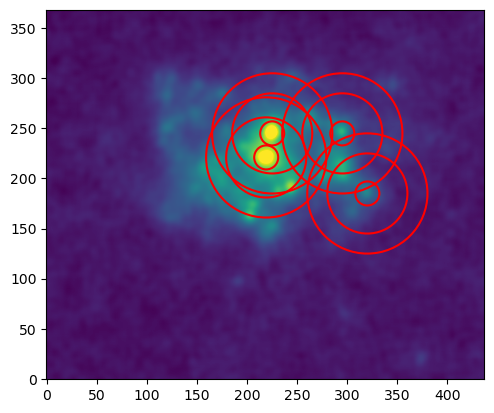

In [351]:
# starting on W4
hdul = fits.open('../Data/imageNGC7793_WISE-Band-4.fits')# for band W4
phdul = hdul[0].data
plt.imshow(phdul, vmax = 152, origin='lower')


#define the Region(s) Of Interest (center x, center y, radius)
ROI = [(225, 245, 12, 40, 60), (219, 221, 12, 40, 60), (320, 185, 12, 40, 60), (295, 245,12, 40, 60)] # (x, y, radius around target, inner r, outer r)
#empty data frame to append values of flux to
#display_data = pd.DataFrame(columns= ['Region', 'X', 'Y', 'Radius', 'Flux (Jy)'])
rows=[]
M0instr = 20.5 # find the relative instrumental zero point magnitude in this specific band (W1) in this case it is 20.5 but the general one is also 20.73
flx_conv_fact =  309.54 # the  Zero Magnitude Flux Density conversion factor 

#results
for i, (x, y, r, annulus_inner, annulus_outer) in  enumerate(ROI):
# For the Target object in the little circle
   #define the target aperture objects 
    target_aperture = CircularAperture((x,y),r,)
    
    #perform aperture photometry on target
    target_photo_table = aperture_photometry(phdul, target_aperture)
    target_counts = target_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_trgt = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    target_flux = flx_conv_fact * 10**(Mcal_trgt/-2.5)      #convert Magnitude to Flux
    #calculate area of annulus
    target_area = target_aperture.area



# For the Background Annuli of outside of the Target
    #define the background annulus for the taget (i think i need to do CircularAperture here too tbh)
    annulus_aperture = CircularAnnulus((x, y), annulus_inner, annulus_outer)

    #perform aperture photometry on annuli
    annulus_photo_table = aperture_photometry(phdul, annulus_aperture)
    annulus_counts = annulus_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_annul = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    annulus_flux = flx_conv_fact * 10**(Mcal_annul/-2.5)      #convert Magnitude to Flux

    #calculate area of annulus
    annulus_area = annulus_aperture.area


# do the calculations for including a Background aperture
    
#Calculating the net flux:
    #calculate the mean background per pixel
    bg_perpixel = annulus_flux/annulus_area

    #calculate the total background in the target aperture
    tot_bg = bg_perpixel * target_area

    #Subtract background from the target flux
    net_flx = target_flux - tot_bg
    
    # Append the result as a dictionary to the list named 'rows'
    rows.append({ 'Region': i+1, 'X': x, 'Y': y, 'Radius': r, 'Annulus Inner Radius': annulus_inner, 'Annulus Outer Radius': annulus_outer, 'Net Flux (Jy)': net_flx})  #will prolly have to change the name of the Flux here!!!
    
display_data = pd.DataFrame(rows)
display_data

#visualizing the apertures
for x, y, r, annulus_inner, annulus_outer in ROI:
    target_apertureplt = CircularAperture((x,y),r)
    annulus_apertureplt = CircularAnnulus((x, y), annulus_inner, annulus_outer)
    target_apertureplt.plot(color='red', lw = 1.5)
    annulus_apertureplt.plot(color='red', lw = 1.5)


hdul.close()
display_data


## For Band W3

,Region,X,Y,Radius,Annulus Inner Radius,Annulus Outer Radius,Net Flux (Jy)
0,1,225,245,12,40,60,0.438664
1,2,219,221,12,40,60,0.458583
2,3,320,185,12,40,60,0.412885
3,4,295,245,12,40,60,0.417817


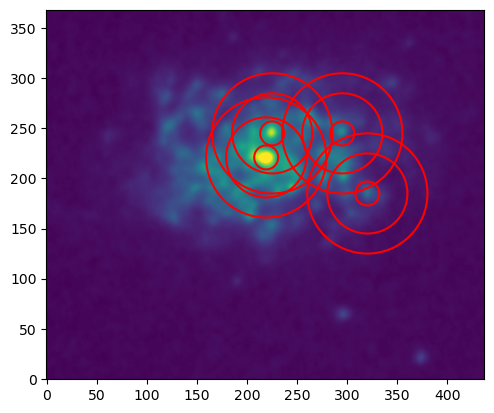

In [350]:

hdul = fits.open('../Data/imageNGC7793_WISE-Band-3.fits')# for band W3
phdul = hdul[0].data
plt.imshow(phdul, vmax = 575, origin='lower')


#define the Region(s) Of Interest (center x, center y, radius)
ROI = [(225, 245, 12, 40, 60), (219, 221, 12, 40, 60), (320, 185, 12, 40, 60), (295, 245,12, 40, 60)] # (x, y, radius around target, inner r, outer r)
#empty data frame to append values of flux to
#display_data = pd.DataFrame(columns= ['Region', 'X', 'Y', 'Radius', 'Flux (Jy)'])
rows=[]
M0instr = 20.5 # find the relative instrumental zero point magnitude in this specific band (W1) in this case it is 20.5 but the general one is also 20.73
flx_conv_fact =  309.54 # the  Zero Magnitude Flux Density conversion factor 

#results
for i, (x, y, r, annulus_inner, annulus_outer) in  enumerate(ROI):
# For the Target object in the little circle
   #define the target aperture objects 
    target_aperture = CircularAperture((x,y),r,)
    
    #perform aperture photometry on target
    target_photo_table = aperture_photometry(phdul, target_aperture)
    target_counts = target_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_trgt = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    target_flux = flx_conv_fact * 10**(Mcal_trgt/-2.5)      #convert Magnitude to Flux
    #calculate area of annulus
    target_area = target_aperture.area



# For the Background Annuli of outside of the Target
    #define the background annulus for the taget (i think i need to do CircularAperture here too tbh)
    annulus_aperture = CircularAnnulus((x, y), annulus_inner, annulus_outer)

    #perform aperture photometry on annuli
    annulus_photo_table = aperture_photometry(phdul, annulus_aperture)
    annulus_counts = annulus_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_annul = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    annulus_flux = flx_conv_fact * 10**(Mcal_annul/-2.5)      #convert Magnitude to Flux

    #calculate area of annulus
    annulus_area = annulus_aperture.area


# do the calculations for including a Background aperture
    
#Calculating the net flux:
    #calculate the mean background per pixel
    bg_perpixel = annulus_flux/annulus_area

    #calculate the total background in the target aperture
    tot_bg = bg_perpixel * target_area

    #Subtract background from the target flux
    net_flx = target_flux - tot_bg
    
    # Append the result as a dictionary to the list named 'rows'
    rows.append({ 'Region': i+1, 'X': x, 'Y': y, 'Radius': r, 'Annulus Inner Radius': annulus_inner, 'Annulus Outer Radius': annulus_outer, 'Net Flux (Jy)': net_flx})  #will prolly have to change the name of the Flux here!!!
    
display_data = pd.DataFrame(rows)
display_data

#visualizing the apertures
for x, y, r, annulus_inner, annulus_outer in ROI:
    target_apertureplt = CircularAperture((x,y),r)
    annulus_apertureplt = CircularAnnulus((x, y), annulus_inner, annulus_outer)
    target_apertureplt.plot(color='red', lw = 1.5)
    annulus_apertureplt.plot(color='red', lw = 1.5)


hdul.close()
display_data

## For Band W2

,Region,X,Y,Radius,Annulus Inner Radius,Annulus Outer Radius,Net Flux (Jy)
0,1,225,245,12,40,60,0.013165
1,2,219,221,12,40,60,0.020263
2,3,320,185,12,40,60,0.008359
3,4,295,245,12,40,60,0.009478


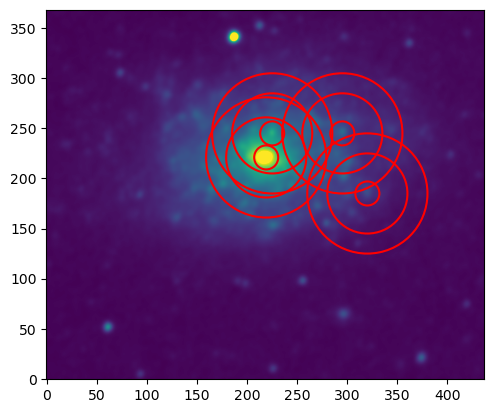

In [349]:
hdul = fits.open('../Data/image_WISE-Band-2.fits')# for band W2
phdul = hdul[0].data
plt.imshow(phdul, vmax = 25, origin='lower')


#define the Region(s) Of Interest (center x, center y, radius)
ROI = [(225, 245, 12, 40, 60), (219, 221, 12, 40, 60), (320, 185, 12, 40, 60), (295, 245,12, 40, 60)] # (x, y, radius around target, inner r, outer r)
#empty data frame to append values of flux to
#display_data = pd.DataFrame(columns= ['Region', 'X', 'Y', 'Radius', 'Flux (Jy)'])
rows=[]
M0instr = 20.5 # find the relative instrumental zero point magnitude in this specific band (W1) in this case it is 20.5 but the general one is also 20.73
flx_conv_fact =  309.54 # the  Zero Magnitude Flux Density conversion factor 

#results
for i, (x, y, r, annulus_inner, annulus_outer) in  enumerate(ROI):
# For the Target object in the little circle
   #define the target aperture objects 
    target_aperture = CircularAperture((x,y),r,)
    
    #perform aperture photometry on target
    target_photo_table = aperture_photometry(phdul, target_aperture)
    target_counts = target_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_trgt = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    target_flux = flx_conv_fact * 10**(Mcal_trgt/-2.5)      #convert Magnitude to Flux
    #calculate area of annulus
    target_area = target_aperture.area



# For the Background Annuli of outside of the Target
    #define the background annulus for the taget (i think i need to do CircularAperture here too tbh)
    annulus_aperture = CircularAnnulus((x, y), annulus_inner, annulus_outer)

    #perform aperture photometry on annuli
    annulus_photo_table = aperture_photometry(phdul, annulus_aperture)
    annulus_counts = annulus_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_annul = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    annulus_flux = flx_conv_fact * 10**(Mcal_annul/-2.5)      #convert Magnitude to Flux

    #calculate area of annulus
    annulus_area = annulus_aperture.area


# do the calculations for including a Background aperture
    
#Calculating the net flux:
    #calculate the mean background per pixel
    bg_perpixel = annulus_flux/annulus_area

    #calculate the total background in the target aperture
    tot_bg = bg_perpixel * target_area

    #Subtract background from the target flux
    net_flx = target_flux - tot_bg
    
    # Append the result as a dictionary to the list named 'rows'
    rows.append({ 'Region': i+1, 'X': x, 'Y': y, 'Radius': r, 'Annulus Inner Radius': annulus_inner, 'Annulus Outer Radius': annulus_outer, 'Net Flux (Jy)': net_flx})  #will prolly have to change the name of the Flux here!!!
    
display_data = pd.DataFrame(rows)
display_data

#visualizing the apertures
for x, y, r, annulus_inner, annulus_outer in ROI:
    target_apertureplt = CircularAperture((x,y),r)
    annulus_apertureplt = CircularAnnulus((x, y), annulus_inner, annulus_outer)
    target_apertureplt.plot(color='red', lw = 1.5)
    annulus_apertureplt.plot(color='red', lw = 1.5)


hdul.close()
display_data

## For Band W1

,Region,X,Y,Radius,Annulus Inner Radius,Annulus Outer Radius,Net Flux (Jy)
0,1,225,245,12,40,60,0.017478
1,2,219,221,12,40,60,0.035215
2,3,320,185,12,40,60,0.006456
3,4,295,245,12,40,60,0.009062


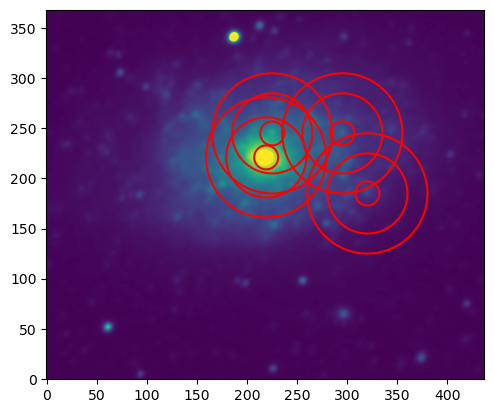

In [344]:
hdul = fits.open('../Data/image_WISE-Band-1.fits')# for band W2
phdul = hdul[0].data
plt.imshow(phdul, vmax = 40, origin='lower')


#define the Region(s) Of Interest (center x, center y, radius)
ROI = [(225, 245, 12, 40, 60), (219, 221, 12, 40, 60), (320, 185, 12, 40, 60), (295, 245,12, 40, 60)] # (x, y, radius around target, inner r, outer r)
#empty data frame to append values of flux to
#display_data = pd.DataFrame(columns= ['Region', 'X', 'Y', 'Radius', 'Flux (Jy)'])
rows=[]
M0instr = 20.5 # find the relative instrumental zero point magnitude in this specific band (W1) in this case it is 20.5 but the general one is also 20.73
flx_conv_fact =  309.54 # the  Zero Magnitude Flux Density conversion factor 

#results
for i, (x, y, r, annulus_inner, annulus_outer) in  enumerate(ROI):
# For the Target object in the little circle
   #define the target aperture objects 
    target_aperture = CircularAperture((x,y),r,)
    
    #perform aperture photometry on target
    target_photo_table = aperture_photometry(phdul, target_aperture)
    target_counts = target_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_trgt = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    target_flux = flx_conv_fact * 10**(Mcal_trgt/-2.5)      #convert Magnitude to Flux
    #calculate area of annulus
    target_area = target_aperture.area



# For the Background Annuli of outside of the Target
    #define the background annulus for the taget (i think i need to do CircularAperture here too tbh)
    annulus_aperture = CircularAnnulus((x, y), annulus_inner, annulus_outer)

    #perform aperture photometry on annuli
    annulus_photo_table = aperture_photometry(phdul, annulus_aperture)
    annulus_counts = annulus_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_annul = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    annulus_flux = flx_conv_fact * 10**(Mcal_annul/-2.5)      #convert Magnitude to Flux

    #calculate area of annulus
    annulus_area = annulus_aperture.area


# do the calculations for including a Background aperture
    
#Calculating the net flux:
    #calculate the mean background per pixel
    bg_perpixel = annulus_flux/annulus_area

    #calculate the total background in the target aperture
    tot_bg = bg_perpixel * target_area

    #Subtract background from the target flux
    net_flx = target_flux - tot_bg
    
    # Append the result as a dictionary to the list named 'rows'
    rows.append({ 'Region': i+1, 'X': x, 'Y': y, 'Radius': r, 'Annulus Inner Radius': annulus_inner, 'Annulus Outer Radius': annulus_outer, 'Net Flux (Jy)': net_flx})  #will prolly have to change the name of the Flux here!!!
    
display_data = pd.DataFrame(rows)
display_data

#visualizing the apertures
for x, y, r, annulus_inner, annulus_outer in ROI:
    target_apertureplt = CircularAperture((x,y),r)
    annulus_apertureplt = CircularAnnulus((x, y), annulus_inner, annulus_outer)
    target_apertureplt.plot(color='red', lw = 1.5)
    annulus_apertureplt.plot(color='red', lw = 1.5)


hdul.close()
display_data

**Original code for everything aperture related**

In [ ]:
#For W1
# for multiple apertures while putting in the flux conversion
hdul = fits.open('../Data/image_WISE-Band-1.fits')
phdul = hdul[0].data
plt.imshow(phdul, vmax = 40, origin='lower')

#define the Region(s) Of Interest (center x, center y, radius)
ROI = [(220, 220, 100, 135, 200), (186, 341, 10, 17, 25)] # (x, y, radius around target, inner r, outer r)
#empty data frame to append values of flux to
#display_data = pd.DataFrame(columns= ['Region', 'X', 'Y', 'Radius', 'Flux (Jy)'])
rows=[]
M0instr = 20.5 # find the relative instrumental zero point magnitude in this specific band (W1) in this case it is 20.5 but the general one is also 20.73
flx_conv_fact =  309.54 # the  Zero Magnitude Flux Density conversion factor 

#results
for i, (x, y, r, annulus_inner, annulus_outer) in  enumerate(ROI):
# For the Target object in the little circle
   #define the target aperture objects 
    target_aperture = CircularAperture((x,y),r,)
    
    #perform aperture photometry on target
    target_photo_table = aperture_photometry(phdul, target_aperture)
    target_counts = target_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_trgt = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    target_flux = flx_conv_fact * 10**(Mcal_trgt/-2.5)      #convert Magnitude to Flux
    #calculate area of annulus
    target_area = target_aperture.area



# For the Background Annuli of outside of the Target
    #define the background annulus for the taget (i think i need to do CircularAperture here too tbh)
    annulus_aperture = CircularAnnulus((x, y), annulus_inner, annulus_outer)

    #perform aperture photometry on annuli
    annulus_photo_table = aperture_photometry(phdul, annulus_aperture)
    annulus_counts = annulus_photo_table['aperture_sum'][0]
    
    #counts to flux
    Mcal_annul = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
    annulus_flux = flx_conv_fact * 10**(Mcal_annul/-2.5)      #convert Magnitude to Flux

    #calculate area of annulus
    annulus_area = annulus_aperture.area


# do the calculations for including a Background aperture
    
#Calculating the net flux:
    #calculate the mean background per pixel
    bg_perpixel = annulus_flux/annulus_area

    #calculate the total background in the target aperture
    tot_bg = bg_perpixel * target_area

    #Subtract background from the target flux
    net_flx = target_flux - tot_bg
    
    # Append the result as a dictionary to the list named 'rows'
    rows.append({ 'Region': i+1, 'X': x, 'Y': y, 'Radius': r, 'Annulus Inner Radius': annulus_inner, 'Annulus Outer Radius': annulus_outer, 'Net Flux (Jy)': net_flx})  #will prolly have to change the name of the Flux here!!!
    
display_data = pd.DataFrame(rows)


#visualizing the apertures
for x, y, r, annulus_inner, annulus_outer in ROI:
    target_apertureplt = CircularAperture((x,y),r)
    annulus_apertureplt = CircularAnnulus((x, y), annulus_inner, annulus_outer)
    target_apertureplt.plot(color='red', lw = 1.5)
    annulus_apertureplt.plot(color='red', lw = 1.5)


hdul.close()
display_data


# Finding the FWHM of sources in the W4 band

also using NGC 7793

In [9]:
from scipy.optimize import curve_fit
from photutils.detection import DAOStarFinder
from astropy.stats import mad_std, sigma_clipped_stats

from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
# look at A) Research with Roy/Code/Lab4code(2and3)-Copy1.ipynb

(148.56389, 148.53787, 0.113534294)


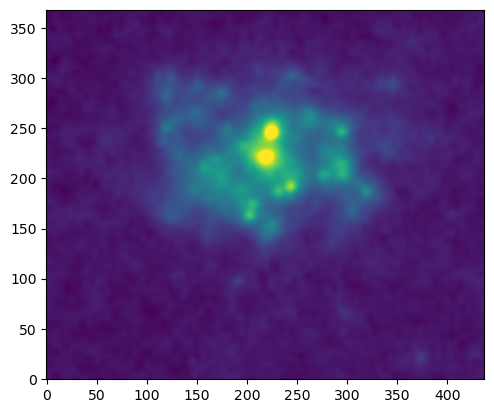

In [10]:
# identify sources in the image
#DOAstarfinder vs IRAFstarfinder. DOA is prolly better. look at the doc you created titled FWHM for more info
# starting on W4
hdul = fits.open('../Data/imageNGC7793_WISE-Band-4.fits')# for band W4
phdul = hdul[0].data

plt.imshow(phdul, vmax = 152, origin='lower')


mean, median, std = sigma_clipped_stats(phdul, sigma=3.0)  
print((mean, median, std))

hdul.close()


In [11]:
# subtract the background and find FWHM of sources at a certain threshold
#started at fwhm= 3 and threshold = 5
daofind = DAOStarFinder(fwhm=3.0, threshold=.7*std) # find the stars in the image that have FWHMs of around 3 pixels and have peaks approximately 5-sigma above the background. 
sources = daofind(phdul - median)  
print(type(sources))
# will likely run into iissues in the code below
for col in sources.colnames:  
    if col not in ('id', 'npix'):
        sources[col].info.format = '%.2f'  # for consistent table output
sources.pprint(max_width=3000)  

#likely the flux labeled in this is not converted!

hdul.close()

<class 'astropy.table.table.QTable'>
 id xcentroid ycentroid sharpness roundness1 roundness2 npix sky  peak flux  mag 
--- --------- --------- --------- ---------- ---------- ---- ---- ---- ---- -----
  1    202.77    163.58      0.37      -0.02       0.12   25 0.00 2.45 1.47 -0.42
  2    231.53    187.29      0.37      -0.02      -0.08   25 0.00 2.24 1.02 -0.03
  3    243.54    191.98      0.38      -0.01       0.07   25 0.00 2.96 1.75 -0.61
  4    219.35    221.02      0.38       0.02      -0.16   25 0.00 4.50 1.93 -0.72
  5    224.46    245.69      0.39       0.00       0.12   25 0.00 4.92 3.34 -1.31
  6    294.29    246.40      0.39      -0.02       0.09   25 0.00 2.17 1.49 -0.43


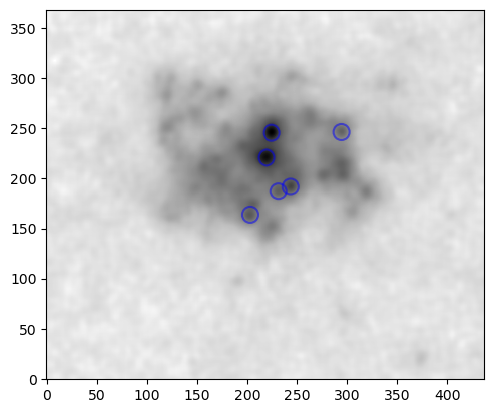

In [12]:
# plot the image with marked locations of all the sources it detected.
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=8.0)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(phdul, cmap='Greys', origin='lower', norm=norm,
           interpolation='nearest')
apertures.plot(color='blue', lw=1.5, alpha=0.5)

In [13]:

amp = sources['peak']

#define the 2d gaussian. look at your docs more more of an xpplanation, but sigma_x and sigma_y are just the std's of the x and y centroids. 
## generally good to make a guess of around 3 pixels 
### xo and yo are the exact same as x and y so you don't need to make another guess with them.

def gaussian2d(xy, amp, xo, yo, sigma_x, sigma_y, theta, offset):
    x, y = xy
    xo = float(xo)
    yo = float(yo)

    #break up 'g' into smaller components a, b, and c
    a = (np.cos(theta)**2) / (2 * sigma_x**2) + (np.sin(theta)**2) / (2 * sigma_y**2)
    b = -( (np.sin(2*theta)) / (4*sigma_x**2) ) + ( (np.sin(2*theta)) / (4*sigma_y**2) )
    c = ((np.sin(theta)**2) / (2*sigma_x**2)) + ((np.cos(theta)**2) / (2*sigma_y**2))
    
    #put them all back into g
    g = offset + amp * np.exp( - (a * ((x-xo)**2) + (2 * b * (x-xo)*(y-yo)) + (c *((y-yo)**2) ) ))
    return g.ravel()

# if something goes wrong in the code, it is more than likely due to the gaussian function you defined.
# you may need to make an initial guess for xo and yo if it doesn't work. but leave their initial guesses empty for now.

In [14]:
#Fit the gaussian to the region around each source
hdul = fits.open('../Data/imageNGC7793_WISE-Band-4.fits')# for band W4
image_data = hdul[0].data
#print(f"Image data shape: {image_data.shape}")
fwhms = []
aperture_radius = 8
print(sources['xcentroid'].shape)

#loop over each source to fit the gaussian and determine the fwhm
for i in range(len(sources)):
    x, y = float(sources['xcentroid'][i]), float(sources['ycentroid'][i])
    #print(f"Source {i+1}: (x, y) = ({x}, {y})")

    #define the bounding box around the source so you can make a mesh grid. 
    ##by subtracting the aperture radius from the maximum of the centroid of x (meaning the center of the aperture in the x axis) it allows you to get the minimum distance from the center needed. and vice versa for the maximum
    ##the reason you use the image_data.shape[1] is because you need to know the shape and size of the image so that the gaussian does not fit to sources outside the image.
    ## in doing all of this, you ensure that the box around the source stays within the image which is especially useful for sources at the edge of the image!
    x_min = max(int(x)- aperture_radius, 0)
    x_max = min(int(x) + aperture_radius, image_data.shape[1])
    y_min = max(int(y) - aperture_radius, 0)
    y_max = min(int(y)+ aperture_radius, image_data.shape[0])

    #extract the region relevant for fitting
    region = phdul[y_min:y_max, x_min:x_max]
    
    #create meshgrid for the region
    x_region = np.linspace(x_min, x_max - 1, x_max - x_min)
    y_region = np.linspace(y_min, y_max - 1, y_max - y_min)
    x_region, y_region = np.meshgrid(x_region, y_region)

    #line of debugging code for the bounding box etc
    #print(f"Source {i+1}: (x, y) = ({x}, {y})")
    #print(f"Bounding box: x_min = {x_min}, x_max = {x_max}, y_min = {y_min}, y_max = {y_max}")
    


    # initial guesses for the parameters of the 2d gaussian and curve_fit. using np.median because you want the middle of the aperture.
    initial_guess = (sources['peak'][i], x, y, 3, 3, 0, np.median(region))
    # Debugging print statement to check the initial guess
    #print(f"Initial guess for source at ({x}, {y}): {initial_guess}")


    #fit the gaussian model
    try:
        optimal_parameters, covariance_parameters = curve_fit(gaussian2d, (x_region, y_region), region.ravel(), p0 = initial_guess )
    except RuntimeError:
            print(f" Could not fit gaussian for source at ({x}, {y})")
            continue
    #extract the sigmas from the optimal parameters
    sigma_x, sigma_y = optimal_parameters[3], optimal_parameters[4]
    #print(sigma_x,sigma_y)
    #calculate the FWHM
    fwhm_y = 2.3548 * sigma_y
    fwhm_x = 2.3548 * sigma_x
    fwhm = np.mean([fwhm_x, fwhm_y])
    fwhms.append(fwhm)

    print(f"Source at ({x}, {y}): FWHM = {fwhm: .2f} pixels")

fwhms






# for visualizing the aperutrues, i wonder if there is a way to loop over all of the radii and then plot it.

(6,)
Source at (202.77355236628748, 163.58436213520173): FWHM =  18.76 pixels
Source at (231.52599630705566, 187.28540944055607): FWHM =  29.42 pixels
Source at (243.53704601307987, 191.97976117792112): FWHM =  16.41 pixels
Source at (219.3512263259923, 221.01715953095214): FWHM =  13.73 pixels
Source at (224.45874821894213, 245.68708777527695): FWHM =  11.24 pixels
Source at (294.2910815710784, 246.3992559600839): FWHM =  11.07 pixels


[18.75739514698606,
 29.424342000972814,
 16.407319638727746,
 13.73120688223499,
 11.244952401092856,
 11.073293789836159]

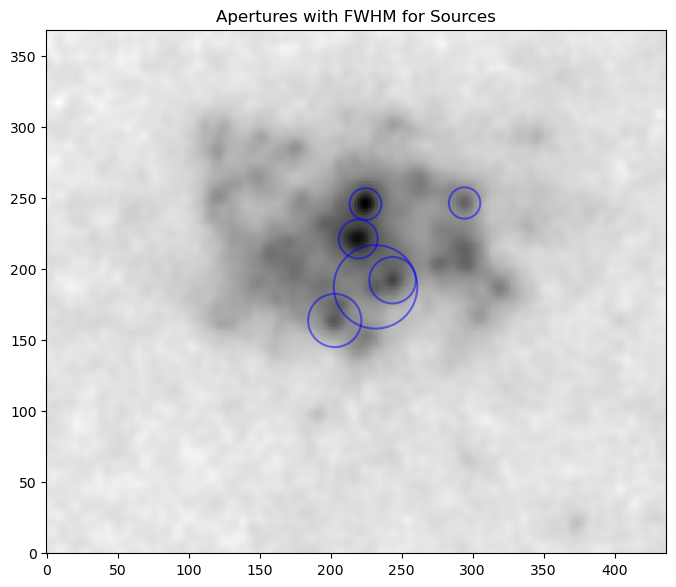

In [467]:
#visualizing the apertures on the image and using the FWHMs for aperture photometry

#define aperture_radii based on the FWHM for each source
aperture_radii = [1* fwhm for fwhm in fwhms]

# initialize figure and axes for plotting:
fig, ax = plt.subplots(figsize=(8, 8))
norm = ImageNormalize(stretch=SqrtStretch())

# plot the image
ax.imshow(image_data, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')

# plot apertures for each source

for i, source in enumerate(sources):
    position = np.transpose((sources['xcentroid'][i], sources['ycentroid'][i])) #may not need the transpose part but we'll see
    aperture_radius = aperture_radii[i]
    aperture = CircularAperture(position, r=aperture_radius)
    phot_table = aperture_photometry(image_data, aperture)
    aperture.plot(ax=ax, color='blue', lw=1.5, alpha=0.5)

ax.set_title('Apertures with FWHM for Sources')
plt.show()


# example of  Determining the extraction region for aperture photometry
   #the 1.5 is there because you want to ensure that it encompasses all of the sources light and flux but also does not capture the background. 
   ## it makes sure you cover the source adequately, so you can def change i if you think you encompass too much or too little.


# Finding where all of Anthony's x-ray sources are 

Using NGC7793

In [5]:
#import huge csv and grab the name and ra and dec needed for each source.
targetgals = pd.read_csv('../Data/inWISE.csv') # this should not be the one for all 120 and should rather be for the 74 of them.
print(targetgals[0:20])
huge = pd.read_csv('../Data/Hugefiles/Source_Flux_All_Modified_5.csv')
columns = ['RA','Dec', 'Gname_Modified','Gname_Homogenized']
g_huge = huge[columns]
g_huge[0:100]

       ra_x   dec_x               source_id  cntr_01    dist_x      pang_x  \
0   201.365 -43.019                NGC 5128      1.0  0.830776  162.673944   
1   184.741  47.303             MESSIER 106      3.0  5.022737  -43.454463   
2   202.468  47.198             MESSIER 051      4.0  6.295556  -65.412743   
3   148.963  69.679             MESSIER 082      5.0  4.934001   60.594118   
4    67.704  64.848                NGC 1569      6.0  8.361842  -51.691199   
5    11.888 -25.288                NGC 0253      8.0  0.993958  158.563643   
6    35.639  42.349                NGC 0891     10.0  3.895011 -134.133495   
7    49.328 -41.106  NGC 1291:[LFF2012] 084     11.0  7.368795 -164.984930   
8   190.530  32.542                NGC 4631     12.0  9.053783   69.702218   
9   192.721  41.120             MESSIER 094     13.0  1.409980   58.249431   
10  196.365 -49.468                NGC 4945     14.0  1.444546  -95.506067   
11  172.005  78.993               UGC 06456     16.0  3.261849 -

/var/folders/nd/77pj43rx7wbcbp0wx2qjq2140000gp/T/ipykernel_1393/2209931399.py:4: DtypeWarning: Columns (533,534) have mixed types. Specify dtype option on import or set low_memory=False.
  huge = pd.read_csv('../Data/Hugefiles/Source_Flux_All_Modified_5.csv')


,RA,Dec,Gname_Modified,Gname_Homogenized
0,201.136801,-42.937508,NGC 5128,NGC 5128
1,201.226235,-42.890604,NGC 5128,NGC 5128
2,201.251918,-42.867054,NGC 5128,NGC 5128
3,201.261449,-42.903627,NGC 5128,NGC 5128
4,201.261306,-43.045427,NGC 5128,NGC 5128
...,...,...,...,...
95,201.369702,-42.996709,NGC 5128,NGC 5128
96,201.370280,-43.041220,NGC 5128,NGC 5128
97,201.370451,-42.991815,NGC 5128,NGC 5128
98,201.371173,-42.862050,NGC 5128,NGC 5128


In [6]:
from astroML.crossmatch import crossmatch_angular
#cross match the catalogs
#max_radius = 2/3600 (2 arcseconds) # may need to change this to one-two arcmin based on the wise photos: (60/3600) or 120/3600. see how they increase or decrease.
#or actually just do the merge thing
df1 = targetgals
df2 = g_huge

merged_data = pd.merge(df1, df2, left_on='source_id', right_on = 'Gname_Homogenized', how='inner')
columns = ['RA','Dec','Gname_Homogenized']
Xray_sources = merged_data[columns]
Xray_sources
#lowkey i think that worked



,RA,Dec,Gname_Homogenized
0,201.136801,-42.937508,NGC 5128
1,201.226235,-42.890604,NGC 5128
2,201.251918,-42.867054,NGC 5128
3,201.261449,-42.903627,NGC 5128
4,201.261306,-43.045427,NGC 5128
...,...,...,...
21906,161.748450,11.865572,MESSIER 096
21907,161.749932,11.739476,MESSIER 096
21908,161.750929,11.806495,MESSIER 096
21909,161.772060,11.850066,MESSIER 096


In [7]:
# just want NGC 7793
sources_7793 = Xray_sources.loc[Xray_sources['Gname_Homogenized'] == 'NGC 7793']
sources_7793



,RA,Dec,Gname_Homogenized
12762,359.356624,-32.642361,NGC 7793
12763,359.381307,-32.624877,NGC 7793
12764,359.389725,-32.580345,NGC 7793
12765,359.394171,-32.575639,NGC 7793
12766,359.402226,-32.645877,NGC 7793
...,...,...,...
13022,359.516009,-32.647343,NGC 7793
13023,359.527867,-32.632343,NGC 7793
13024,359.532874,-32.603760,NGC 7793
13025,359.535071,-32.646288,NGC 7793


## plotting the sources on the image of NGC 7793


I wonder if I'll need the "theta" from the huge csv file. or what that even means. cuz i feel like that might be useful for the gaussian maybe

NameError: name 'ImageNormalize' is not defined

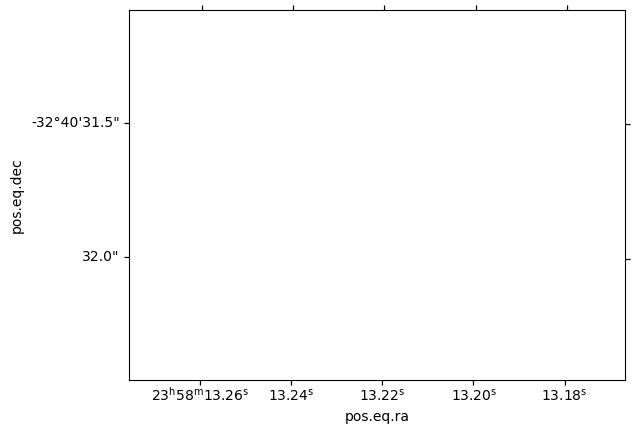

In [8]:
#plotting just the sources
hdul = fits.open('../Data/imageNGC7793_WISE-Band-4.fits')# for band W4
hdr = fits.getheader('../Data/imageNGC7793_WISE-Band-4.fits')
wcs = WCS(hdr)

image_data = hdul[0].data

#plot the image
fig, ax = plt.subplots(subplot_kw = {'projection': wcs})
norm = ImageNormalize(image_data, stretch=SqrtStretch())
ax.imshow(image_data, cmap= 'gray', norm=norm)

#plot the sources with circles
ra = sources_7793['RA'].values
dec = sources_7793['Dec'].values

# convert Ra and dec values to pixel coordinates
positions = wcs.world_to_pixel_values(ra,dec)

#create circular apertures for each source
apertures = [CircularAperture((x, y), r=5) for x, y in zip(*positions)]

#plot each aperture
for aperture in apertures:
    aperture.plot(ax=ax, color='blue', lw=1.5, alpha=0.5)

plt.xlabel('RA')
plt.ylabel('Dec')
plt.grid(color='white', ls='dotted')
plt.show()



hdul.close()

## Performing Aperture photometry on all of the xray sources for NGC 7793
Must plot them with the same (uniform) FWHM. so i think i will just use the one in the very center (13.73 pixels)

maybe determine what size it should be by finding every single point source in the image and calculating the FWHM of it and then just using the average of that. and doing this for every image.

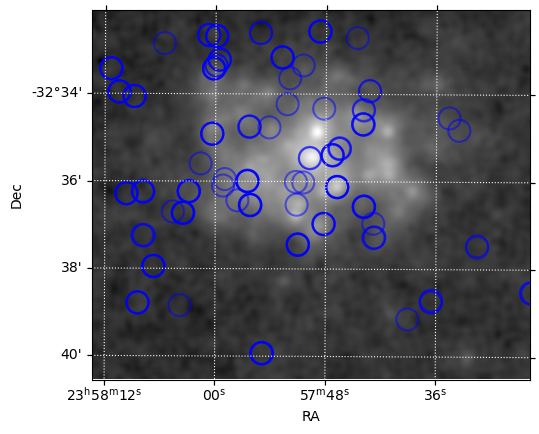

In [528]:
#plotting just the sources
hdul = fits.open('../Data/imageNGC7793_WISE-Band-4.fits')# for band W4
hdr = fits.getheader('../Data/imageNGC7793_WISE-Band-4.fits')
wcs = WCS(hdr)

image_data = hdul[0].data

#plot the image
fig, ax = plt.subplots(subplot_kw = {'projection': wcs})
norm = ImageNormalize(image_data, stretch=SqrtStretch())
ax.imshow(image_data, cmap= 'gray', norm=norm)

#plot the sources with circles
ra = sources_7793['RA'].values
dec = sources_7793['Dec'].values

# convert Ra and dec values to pixel coordinates
positions = wcs.world_to_pixel_values(ra,dec)

#create circular apertures for each source
apertures = [CircularAperture((x, y), r=11) for x, y in zip(*positions)]

#plot each aperture
for aperture in apertures:
    aperture.plot(ax=ax, color='blue', lw=1.5, alpha=0.5)

plt.xlabel('RA')
plt.ylabel('Dec')
plt.grid(color='white', ls='dotted')
plt.show()

In [534]:
print(image_data[0])

[148.49783 148.49527 148.4903  148.48404 148.47336 148.45917 148.44681
 148.42789 148.41379 148.40785 148.40674 148.40663 148.40828 148.41911
 148.43648 148.45297 148.47588 148.496   148.5131  148.5261  148.52637
 148.51729 148.49881 148.48001 148.46423 148.44775 148.43848 148.43228
 148.43845 148.45518 148.4755  148.49509 148.51549 148.53487 148.54102
 148.54497 148.54417 148.54321 148.53345 148.51843 148.50273 148.48694
 148.47275 148.46182 148.45708 148.45322 148.45218 148.44379 148.4346
 148.4217  148.40958 148.39993 148.39426 148.39728 148.40192 148.40707
 148.41931 148.43803 148.45517 148.47552 148.49376 148.506   148.51013
 148.50624 148.49686 148.48183 148.46942 148.45439 148.4433  148.43694
 148.43474 148.44063 148.4494  148.46426 148.47055 148.47516 148.46951
 148.45877 148.44955 148.4382  148.44322 148.44913 148.4614  148.4744
 148.49147 148.5003  148.50227 148.50848 148.51248 148.51773 148.51744
 148.52023 148.52573 148.53253 148.53963 148.53842 148.53372 148.52231
 148.508

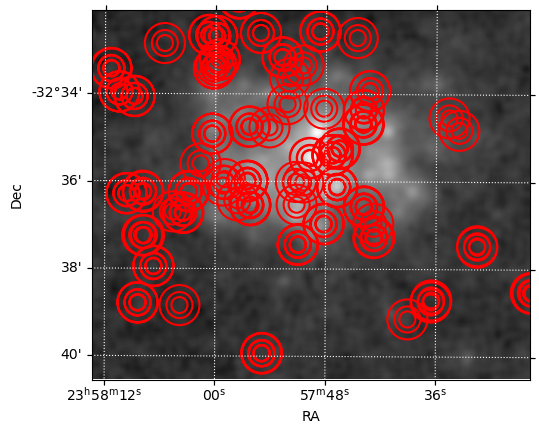

,Region,X,Y,Radius,Annulus Inner Radius,Annulus Outer Radius,Net Flux (Jy),Flag
0,1,438.390141,84.948539,8,13,20,NaN,Overlap
1,2,384.241649,131.050066,8,13,20,NaN,Overlap
2,3,366.350472,247.742249,8,13,20,0.042231,Valid
3,4,356.612296,260.118440,8,13,20,0.042230,Valid
4,5,337.807192,76.341836,8,13,20,NaN,Overlap
...,...,...,...,...,...,...,...,...
260,261,86.959675,73.805157,8,13,20,0.042156,Valid
261,262,60.992954,113.194277,8,13,20,NaN,Overlap
262,263,50.282113,188.073970,8,13,20,NaN,Overlap
263,264,44.950183,76.758442,8,13,20,NaN,Overlap


In [17]:
# starting on W4 ALSO USING THE CODE ABOVE THIS CELL
#plotting just the sources
hdul = fits.open('../Data/imageNGC7793_WISE-Band-4.fits')# for band W4
hdr = fits.getheader('../Data/imageNGC7793_WISE-Band-4.fits')
wcs = WCS(hdr)

image_data = hdul[0].data

#plot the image
fig, ax = plt.subplots(subplot_kw = {'projection': wcs})
norm = ImageNormalize(image_data, stretch=SqrtStretch())
ax.imshow(image_data, cmap= 'gray', norm=norm)

#plot the sources with circles
ra = sources_7793['RA'].values
dec = sources_7793['Dec'].values

# convert Ra and dec values to pixel coordinates
positions = wcs.world_to_pixel_values(ra,dec)
postions = list(zip(positions[0], positions[1]))

#define the Region(s) Of Interest (center x, center y, radius)
ROI = [ ((x, y) , 8, 13, 20) for x,y in zip(*positions) ] # (x, y, radius around target, inner r, outer r)    36.3636, 50.90909)
#empty data frame to append values of flux to
#display_data = pd.DataFrame(columns= ['Region', 'X', 'Y', 'Radius', 'Flux (Jy)'])
rows=[]
M0instr = 20.5 # find the relative instrumental zero point magnitude in this specific band (W1) in this case it is 20.5 but the general one is also 20.73
flx_conv_fact =  309.54 # the  Zero Magnitude Flux Density conversion factor 

# defining a function to calculate the distances between two sources.
def dist(p1, p2):
    return np.sqrt( (p2[0] - p1[0])**2 + (p2[1] - p1[1])**2 )


# check for overlap and perform aperture photometry
for i, ((x, y), r, annulus_inner, annulus_outer) in  enumerate(ROI):
    overlap = False
    for j, ((x2, y2), r2, annulus_inner, annulus_outer) in  enumerate(ROI): # apparently you can run a for loop over 2 objects by putting the second one inside the first
        if i != j: # have this explained not sure what it means
            distance = dist((x, y) , (x2, y2)) 
            if distance < r + r2:  # if the distance is less than the size of the two radii added together, then they are overlapping.
                overlap_percent = (r + r2 - distance)/(r+r2)  # the amount they are overlapping divided by the total size of radii distance
                if overlap_percent > .5:
                    overlap = True # this way, if they overlap by more than 50% then they will not be usable because less than 50% of the flux extractable area can be seen.
                    break
    if overlap:
        #flag the sources that overlap
        rows.append({ 'Region': i+1, 'X': x, 'Y': y, 'Radius': r, 'Annulus Inner Radius': annulus_inner,
                      'Annulus Outer Radius': annulus_outer, 'Net Flux (Jy)': np.nan, 'Flag': 'Overlap' }) 
    else: #perform all the aperture photometry stuff
        # For the Target object in the little circle
        #define the target aperture objects 
        target_aperture = CircularAperture((x,y),r,)
    
        #perform aperture photometry on target
        target_photo_table = aperture_photometry(phdul, target_aperture)
        target_counts = target_photo_table['aperture_sum'][0]
    
        #counts to flux
        Mcal_trgt = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
        target_flux = flx_conv_fact * 10**(Mcal_trgt/-2.5)      #convert Magnitude to Flux
        #calculate area of annulus
        target_area = target_aperture.area



        # For the Background Annuli of outside of the Target
        #define the background annulus for the taget (i think i need to do CircularAperture here too tbh)
        annulus_aperture = CircularAnnulus((x, y), annulus_inner, annulus_outer)

        #perform aperture photometry on annuli
        annulus_photo_table = aperture_photometry(phdul, annulus_aperture)
        annulus_counts = annulus_photo_table['aperture_sum'][0]
    
        #counts to flux
        Mcal_annul = M0instr - 2.5*(np.log10(target_counts))     #converting counts to magnitude
        annulus_flux = flx_conv_fact * 10**(Mcal_annul/-2.5)      #convert Magnitude to Flux

        #calculate area of annulus
        annulus_area = annulus_aperture.area


        # do the calculations for including a Background aperture
    
        #Calculating the net flux:
     #calculate the mean background per pixel
        bg_perpixel = annulus_flux/annulus_area

        #calculate the total background in the target aperture
        tot_bg = bg_perpixel * target_area

        #Subtract background from the target flux
        net_flx = target_flux - tot_bg
    
        #   Append the result as a dictionary to the list named 'rows'
        rows.append({ 'Region': i+1, 'X': x, 'Y': y, 'Radius': r, 'Annulus Inner Radius': annulus_inner, 
                 'Annulus Outer Radius': annulus_outer, 'Net Flux (Jy)': net_flx, 'Flag':'Valid'})  #will prolly have to change the name of the Flux here!!!
    

    
display_data = pd.DataFrame(rows)
display_data

#visualizing the apertures
for ((x, y), r, annulus_inner, annulus_outer) in ROI:
    target_apertureplt = CircularAperture((x,y),r)
    annulus_apertureplt = CircularAnnulus((x, y), annulus_inner, annulus_outer)
    target_apertureplt.plot(color='red', lw = 1.5)
    annulus_apertureplt.plot(color='red', lw = 1.5)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.grid(color='white', ls='dotted')
plt.show()

hdul.close()
display_data

### Dont think i need the code below in this cell

In [505]:
#Fit the gaussian to the region around each source
hdul = fits.open('../Data/imageNGC7793_WISE-Band-4.fits')# for band W4
image_data = hdul[0].data
#print(f"Image data shape: {image_data.shape}")
fwhms = []
aperture_radius = 8
#print(sources['xcentroid'].shape)

#loop over each source to fit the gaussian and determine the fwhm
for i in range(len(sources_7793)):
    x, y = float(sources_7793['RA'][i]), float(sources_7793['Dec'][i])
    print(f"Source {i+1}: (x, y) = ({x}, {y})")

    #define the bounding box around the source so you can make a mesh grid. 
    ##by subtracting the aperture radius from the maximum of the centroid of x (meaning the center of the aperture in the x axis) it allows you to get the minimum distance from the center needed. and vice versa for the maximum
    ##the reason you use the image_data.shape[1] is because you need to know the shape and size of the image so that the gaussian does not fit to sources outside the image.
    ## in doing all of this, you ensure that the box around the source stays within the image which is especially useful for sources at the edge of the image!
    x_min = max(int(x)- aperture_radius, 0)
    x_max = min(int(x) + aperture_radius, image_data.shape[1])
    y_min = max(int(y) - aperture_radius, 0)
    y_max = min(int(y)+ aperture_radius, image_data.shape[0])

    #extract the region relevant for fitting
    region = phdul[y_min:y_max, x_min:x_max]
    
    #create meshgrid for the region
    x_region = np.linspace(x_min, x_max - 1, x_max - x_min)
    y_region = np.linspace(y_min, y_max - 1, y_max - y_min)
    x_region, y_region = np.meshgrid(x_region, y_region)

    #line of debugging code for the bounding box etc
    #print(f"Source {i+1}: (x, y) = ({x}, {y})")
    #print(f"Bounding box: x_min = {x_min}, x_max = {x_max}, y_min = {y_min}, y_max = {y_max}")
    
# need to change the value of sources['peak'][i] so trying to find a way around that.

    # initial guesses for the parameters of the 2d gaussian and curve_fit. using np.median because you want the middle of the aperture.
    initial_guess = (sources['peak'][i], x, y, 1, 1, 0, np.median(region))
    # Debugging print statement to check the initial guess
    print(f"Initial guess for source at ({x}, {y}): {initial_guess}")


    #fit the gaussian model
    try:
        optimal_parameters, covariance_parameters = curve_fit(gaussian2d, (x_region, y_region), region.ravel(), p0 = initial_guess )
    except RuntimeError:
            print(f" Could not fit gaussian for source at ({x}, {y})")
            continue
    #extract the sigmas from the optimal parameters
    sigma_x, sigma_y = optimal_parameters[3], optimal_parameters[4]
    print(sigma_x,sigma_y)
    #calculate the FWHM
    fwhm_y = 2.3548 * sigma_y
    fwhm_x = 2.3548 * sigma_x
    fwhm = np.mean([fwhm_x, fwhm_y])
    fwhms.append(fwhm)

    print(f"Source at ({x}, {y}): FWHM = {fwhm: .2f} pixels")

fwhms


KeyError: 0

# Putting it all together

scraping through the WISE image set and pulling all 74 galaxies in all four Wavelengths

**Outline**
- pull all of the images and their Wavelengths
- for each galaxy
    - run the aperture photometry for each Band wavelength of the observed galaxy. Starting with the 4th band.